In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error



In [3]:
from google.colab import files
uploaded=files.upload()

Saving Customer Churn new.csv to Customer Churn new.csv


In [4]:
df=pd.read_csv("Customer Churn new.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [9]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
EstimatedSalary,0


In [10]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
EstimatedSalary,9999


In [11]:
def valueCounts(df):
    for col in df.columns:
        print(df[col].value_counts())
valueCounts(df)

RowNumber
4833    1
3652    1
253     1
9737    1
9672    1
       ..
2137    1
2022    1
1679    1
1620    1
747     1
Name: count, Length: 10000, dtype: int64
CustomerId
15808389    1
15628999    1
15793726    1
15644103    1
15636061    1
           ..
15621893    1
15795519    1
15569178    1
15770309    1
15787619    1
Name: count, Length: 10000, dtype: int64
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Mickey        1
Kapustina     1
Lappin        1
Vanzetti      1
Mayrhofer     1
Name: count, Length: 2932, dtype: int64
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
386      1
404      1
351      1
441      1
Name: count, Length: 460, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
83      1
82    

In [12]:

duplicates=df[df.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, EstimatedSalary, Exited]
Index: []


INSIGHTS

/tmp/ipython-input-13-625629521.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Geography', y='Exited', ax=axes[0], palette='Set2')
/tmp/ipython-input-13-625629521.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Gender', y='Exited', ax=axes[1], palette='Set1')


<Figure size 800x600 with 0 Axes>

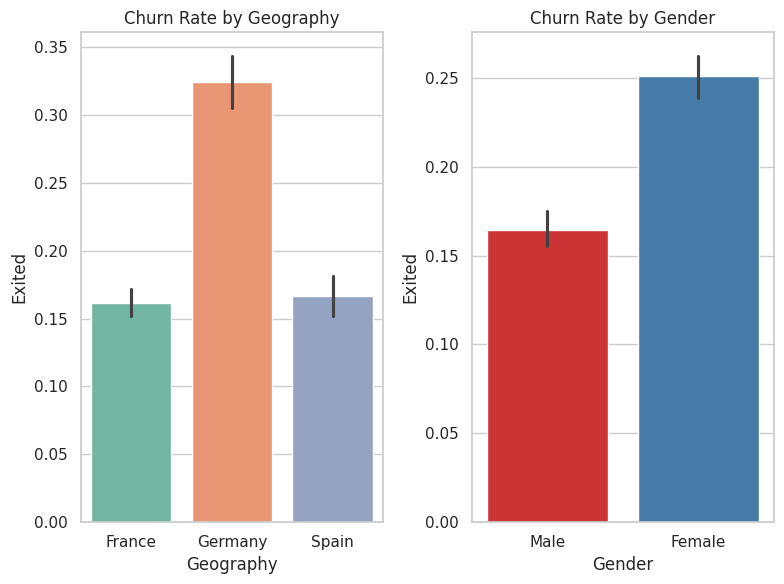

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-analytical columns
df_cleaned = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Bivariate Analysis - Churn vs Geography and Gender
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.barplot(data=df_cleaned, x='Geography', y='Exited', ax=axes[0], palette='Set2')
axes[0].set_title('Churn Rate by Geography')

sns.barplot(data=df_cleaned, x='Gender', y='Exited', ax=axes[1], palette='Set1')
axes[1].set_title('Churn Rate by Gender')
plt.tight_layout()
plt.show()




/tmp/ipython-input-14-3686761436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Exited', y=col, palette='deep')


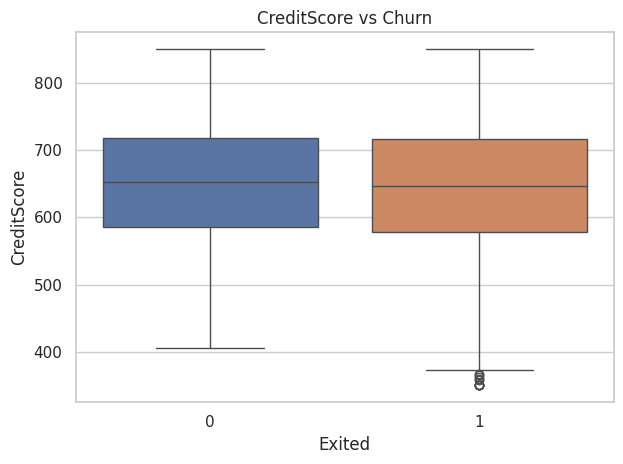

/tmp/ipython-input-14-3686761436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Exited', y=col, palette='deep')


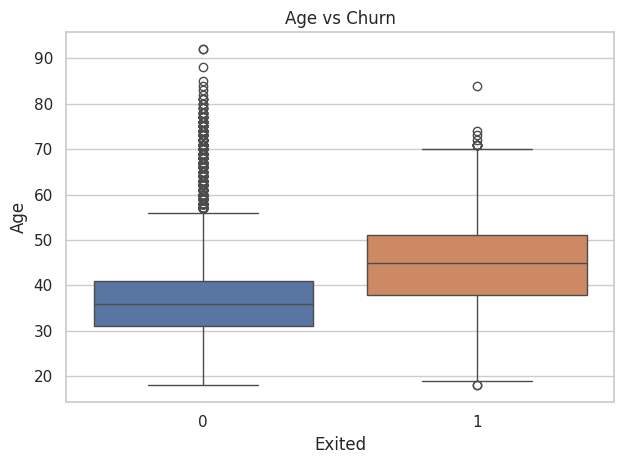

/tmp/ipython-input-14-3686761436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Exited', y=col, palette='deep')


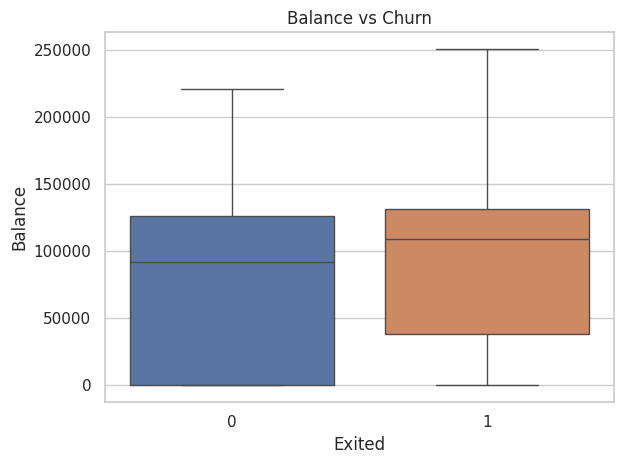

/tmp/ipython-input-14-3686761436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Exited', y=col, palette='deep')


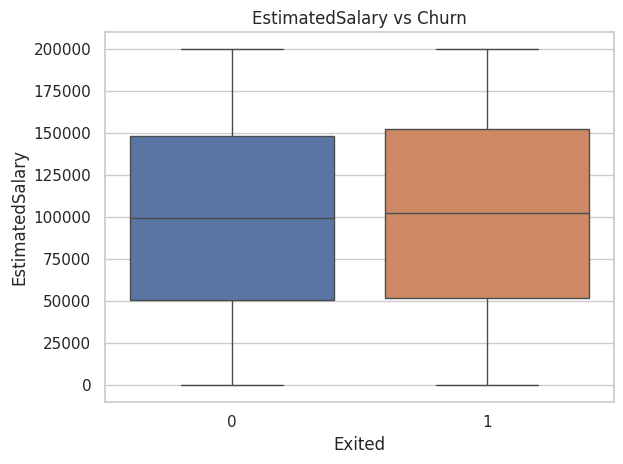

In [14]:
# Boxplots for Numerical Features vs Churn
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for col in numerical_cols:
    sns.boxplot(data=df_cleaned, x='Exited', y=col, palette='deep')
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()



**General Boxplot Anatomy:**

A boxplot shows the distribution of a numeric variable, split by a category (in this case, Exited):

The box shows the interquartile range (IQR = 25th to 75th percentile).

The line inside the box is the median.

The "whiskers" show the range, excluding outliers.

Dots are outliers (extremely high/low values).

Now let's interpret each feature's boxplot:

 **CreditScore vs Exited**

Median credit score is slightly lower for churned customers (Exited=1).

Distribution is similar for both, but churners tend to skew toward the lower end.

➤ Lower credit scores may have a mild association with churn.

 **Age vs Exited**

Churned customers (Exited=1) have a much higher median age.

Many churners are in the older age bracket (e.g., 40+).

➤ Age is a strong indicator: older customers are more likely to leave.

**Balance vs Exited**

Median balance is higher for churned customers.

Many non-churners have zero balance, while churners tend to have higher balances.

➤ Customers with more money in their account are more likely to churn — possibly due to switching banks or using financial services elsewhere.

EstimatedSalary vs Exited
Very similar distributions for both churned and retained customers.

No clear pattern or difference in median or spread.

➤ Estimated salary is not a strong churn predictor on its own.

**Summary:**

Feature	Churn Insight

CreditScore:Slightly lower scores in churned customers

Age:Older customers more likely to churn

Balance:High balances linked with higher churn

EstimatedSalary:Not significantly related to churn



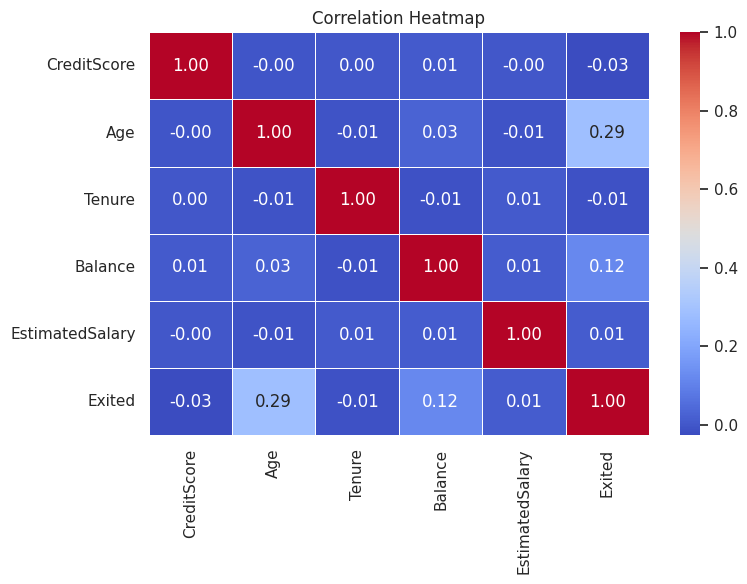

In [15]:


# Select only numeric columns
numeric_df =df_cleaned.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Here is the correlation heatmap for the numerical features in dataset. Here's how to interpret it:

Strongest correlation with Exited (churn):

Age and Balance have a moderate positive correlation with Exited.

CreditScore, Tenure, and EstimatedSalary have weak or negligible correlation with churn.

Highly correlated internal features (not necessarily with Exited):

Balance and EstimatedSalary have low correlation with other features, suggesting they vary independently.

In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded=df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Convert categorical variables to numerical (one-hot encoding,bcz for unorder categories or less no of categories we use one-hot,ow label encoding

# Label encode 'Gender'
encoding1= LabelEncoder()
df_encoded['Gender'] =encoding1.fit_transform(df['Gender'])  # Male=1, Female=0

# One-hot encode 'Geography'
df_encoded = pd.get_dummies(df_encoded, columns=['Geography'], drop_first=True).astype(int)  # Drops 'France' as base

# Final check
print(df_encoded.head())


   CreditScore  Gender  Age  Tenure  Balance  EstimatedSalary  Exited  \
0          844       1   18       2   160980           145936       0   
1          656       1   18      10   151762           127014       0   
2          570       0   18       4    82767            71811       0   
3          716       0   18       3   128743           197322       0   
4          727       1   18       4   133550            46941       0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  


In [17]:
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 	#Same split each time(random state)and
                                                                                                        #Prevents imbalance in splits(stratify)

In [18]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)
clf.fit(X_train, y_train)

y_pred =clf.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1593
           1       0.71      0.20      0.31       407

    accuracy                           0.82      2000
   macro avg       0.77      0.59      0.61      2000
weighted avg       0.80      0.82      0.78      2000

ROC-AUC: 0.7879990930838388
0.821
[[1560   33]
 [ 325   82]]
0.179
0.179
0.4230839160261236


<Axes: >

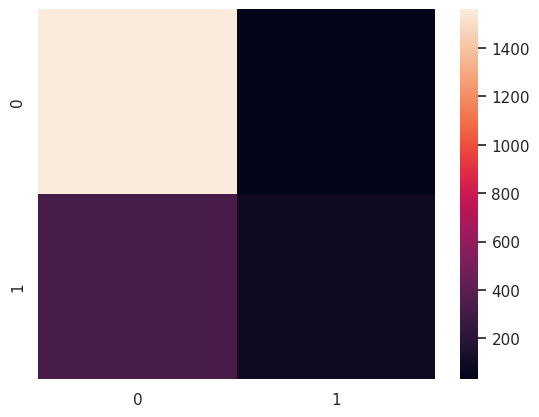

In [21]:
print("Random Forest Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

**SMOTEEN**

SMOTEEN = SMOTE + ENN

SMOTE	Oversamples the minority class (churners) by creating synthetic samples while
ENN	Cleans the dataset by removing noisy majority class samples (non-churners).
SMOTEEN	Combines both: creates more churn samples and removes unclear non-churners


In [23]:

# Step 1: Apply SMOTEEN on original training data
smote_enn = SMOTEENN(random_state=42)
X_resampled1, y_resampled1 = smote_enn.fit_resample(X_train, y_train)

# Step 2: Split resampled data
xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

# Step 3: Train Random Forest on SMOTEEN-resampled data
model_rf_smote = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=6,
    min_samples_leaf=8,
    random_state=100
)
model_rf_smote.fit(xr_train1, yr_train1)

# Step 4: Predict and evaluate on test set from SMOTEEN-split
yr_predict1 = model_rf_smote.predict(xr_test1)
yr_prob1 = model_rf_smote.predict_proba(xr_test1)[:, 1]

# Evaluation
print(f"Accuracy: {model_rf_smote.score(xr_test1, yr_test1):.4f}")
print("\nClassification Report:\n", classification_report(yr_test1, yr_predict1))
print("ROC-AUC:", roc_auc_score(yr_test1, yr_prob1))
print("Confusion Matrix:\n", confusion_matrix(yr_test1, yr_predict1))


Accuracy: 0.7622

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.71       465
           1       0.75      0.85      0.80       561

    accuracy                           0.76      1026
   macro avg       0.77      0.75      0.76      1026
weighted avg       0.77      0.76      0.76      1026

ROC-AUC: 0.8612960726812717
Confusion Matrix:
 [[304 161]
 [ 83 478]]


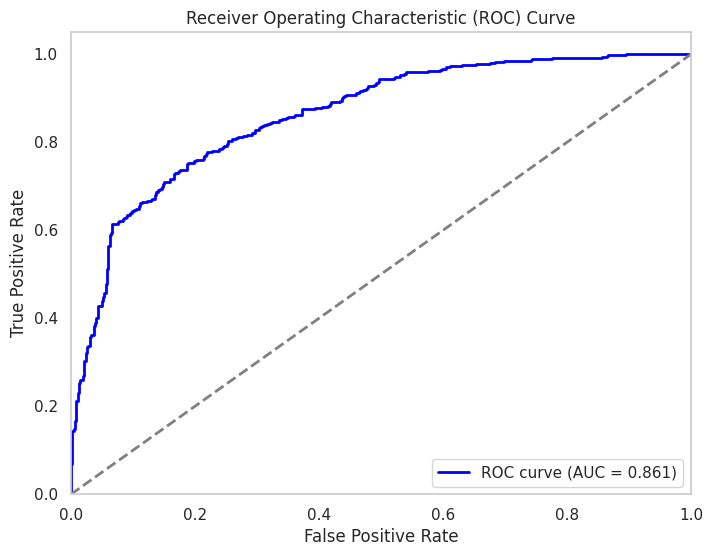

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume `yr_test1` is your true labels and `yr_prob1` are predicted probabilities
fpr, tpr, thresholds = roc_curve(yr_test1, yr_prob1)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The Random Forest model trained on data balanced with SMOTEENN significantly improved the ability to identify customer churners. Despite a moderate overall accuracy of 76.2%, the model achieved:

Recall of 85% for churners, meaning it successfully identified the majority of customers likely to leave.

F1-score of 0.80 for the churn class, indicating a strong balance between precision and recall.

A high ROC-AUC of 0.86, showing excellent capability to distinguish between churners and non-churners.

While accuracy is slightly lower than models trained on imbalanced data, the goal of churn prediction is to maximize recall for class 1 (churners), which this model handles effectively.

**Conclusion:**

This Random Forest model, enhanced with SMOTEENN, is a robust and reliable solution for churn prediction. It is well-suited for business scenarios where proactively identifying at-risk customers is more important than overall accuracy.



In [24]:
import joblib

# Export the trained Random Forest model
joblib.dump(model_rf_smote, 'random_forest_churn_model.pkl')
print("✅ Model saved as 'random_forest_churn_model.pkl'")


✅ Model saved as 'random_forest_churn_model.pkl'


In [26]:
# Load the saved model
loaded_rf_model = joblib.load('random_forest_churn_model.pkl')

# Predict
y_pred = loaded_rf_model.predict(X_test)  # or any new data
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [28]:
import pandas as pd

# Combine predictions with actual values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results_df.head(20))  # View top 20 rows


      Actual  Predicted
4963       0          0
3133       0          0
1378       0          1
4937       0          1
3662       0          0
7516       0          1
6284       0          0
4586       0          0
728        0          0
4598       0          0
8705       1          1
4519       0          0
4762       0          0
5378       0          1
4890       0          0
2250       0          0
4369       0          0
3043       0          0
5293       1          0
3880       0          0


The model output compares actual churn values against predicted values, helping us assess how accurately the model identifies customers who are likely to leave.The churn prediction model demonstrated an overall accuracy of 76.2%, with a strong ROC-AUC score of 0.86. It successfully identified 85% of churners, making it a reliable tool for proactive customer retention strategies. While some false positives were observed (predicting churn where none occurred), this is acceptable in churn analysis, as the cost of missing a real churner is typically higher than reaching out to a customer who was not planning to leave.